## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [8]:
import pandas as pd

file_path = r'C:\Users\Katarina\Desktop\distance_dataset (1).csv'
df = pd.read_csv(file_path, index_col=0)
print(df.head())

          X         Y         Z  ClusterID
0  5.135779  4.167542  5.787635          4
1  4.280721  5.770909  6.091044          4
2  8.329098  7.540436  3.247239          2
3  5.470224  5.069249  5.768313          4
4  2.381797  2.402374  3.879101          1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [11]:
matrix_2d = df[['Y', 'Z']].values
matrix_3d = df[['X', 'Y', 'Z']].values

print("2D matrix shape:", matrix_2d.shape)
print("3D matrix shape:", matrix_3d.shape)

print("\n2D matrix first 5 rows:")
print(matrix_2d[:5])
print("\n3D matrix first 5 rows:")
print(matrix_3d[:5])

2D matrix shape: (2000, 2)
3D matrix shape: (2000, 3)

2D matrix first 5 rows:
[[4.16754224 5.7876354 ]
 [5.77090875 6.0910442 ]
 [7.54043595 3.2472394 ]
 [5.06924901 5.76831344]
 [2.40237389 3.87910086]]

3D matrix first 5 rows:
[[5.13577939 4.16754224 5.7876354 ]
 [4.2807207  5.77090875 6.0910442 ]
 [8.3290979  7.54043595 3.2472394 ]
 [5.47022447 5.06924901 5.76831344]
 [2.38179703 2.40237389 3.87910086]]


Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate cosine similarity for 3D matrix
simCosine3D = 1 - cosine_similarity(matrix_3d, [[5,5,5]])
# Calculate cosine similarity for 2D matrix
simCosine2D = 1 - cosine_similarity(matrix_2d, [[5,5]])

print("3D Cosine Similarity (first 5 values):")
print(simCosine3D[:5])
print("\n2D Cosine Similarity (first 5 values):")
print(simCosine2D[:5])

3D Cosine Similarity (first 5 values):
[[0.00864045]
 [0.01057566]
 [0.05626938]
 [0.00138525]
 [0.02822497]]

2D Cosine Similarity (first 5 values):
[[0.0129846 ]
 [0.00036399]
 [0.0708751 ]
 [0.0020739 ]
 [0.02653907]]


Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

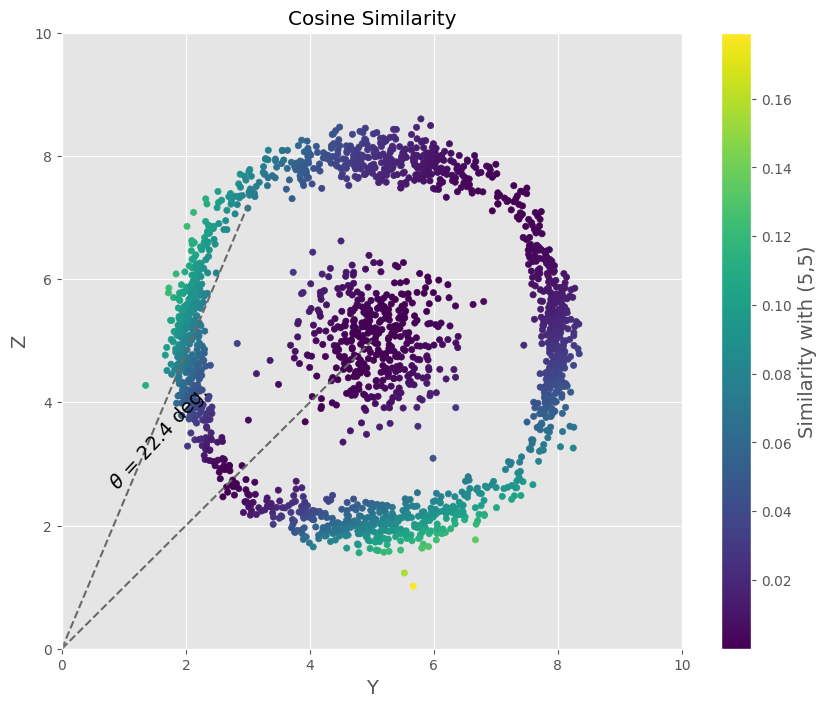

In [15]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine2D[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)
plt.show()
#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

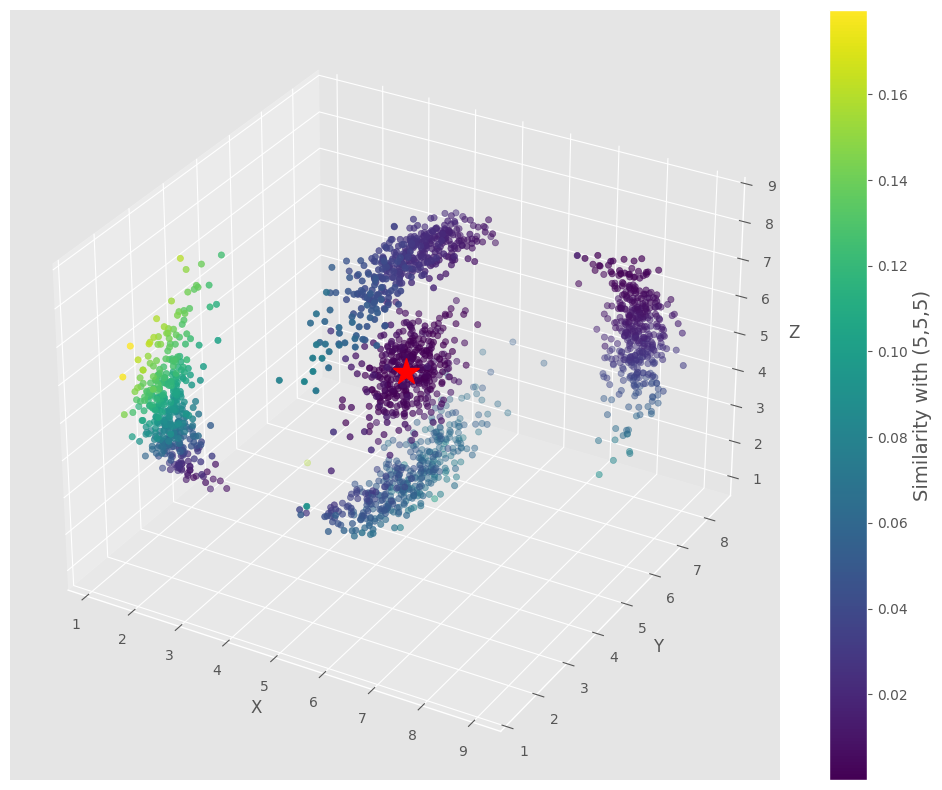

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(matrix_3d[:,0], matrix_3d[:,1], matrix_3d[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)

ax.plot([5], [5], [5], 'r*', markersize=20)
figCosine3D.tight_layout()
plt.show()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1, Document2]

X_train_counts = count_vect.fit_transform(corpus)

df = pd.DataFrame(X_train_counts.toarray(),
                  columns=count_vect.get_feature_names_out(),
                  index=['Document 0', 'Document 1'])

print(df)

            coffee  essence  of  starbucks
Document 0       1        0   0          1
Document 1       1        1   1          0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
trsfm = vectorizer.fit_transform(corpus)
df = pd.DataFrame(trsfm.toarray(),
                  columns=vectorizer.get_feature_names_out(),
                  index=['Document 0', 'Document 1'])

print(df)

              coffee   essence        of  starbucks
Document 0  0.579739  0.000000  0.000000   0.814802
Document 1  0.449436  0.631667  0.631667   0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [30]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [31]:
Document0 = "Artificial intelligence is revolutionizing various industries"
Document1 = "Machine learning algorithms are transforming data analysis"

corpus = [Document0, Document1]

print("Corpus created:")
for i, doc in enumerate(corpus):
    print(f"Document {i}: {doc}")

Corpus created:
Document 0: Artificial intelligence is revolutionizing various industries
Document 1: Machine learning algorithms are transforming data analysis


 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [32]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)

# Display the result as a DataFrame
df_counts = pd.DataFrame(X_train_counts.toarray(),
                         columns=count_vect.get_feature_names_out(),
                         index=['Document 0', 'Document 1'])

print(df_counts)

            algorithms  analysis  are  artificial  data  industries  \
Document 0           0         0    0           1     0           1   
Document 1           1         1    1           0     1           0   

            intelligence  is  learning  machine  revolutionizing  \
Document 0             1   1         0        0                1   
Document 1             0   0         1        1                0   

            transforming  various  
Document 0             0        1  
Document 1             1        0  


 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [33]:
import pandas as pd

df_counts = pd.DataFrame(X_train_counts.toarray(),
                         columns=count_vect.get_feature_names_out(),
                         index=['Document 0', 'Document 1'])

print(df_counts)

            algorithms  analysis  are  artificial  data  industries  \
Document 0           0         0    0           1     0           1   
Document 1           1         1    1           0     1           0   

            intelligence  is  learning  machine  revolutionizing  \
Document 0             1   1         0        0                1   
Document 1             0   0         1        1                0   

            transforming  various  
Document 0             0        1  
Document 1             1        0  


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

df_tfidf = pd.DataFrame(tfidf_matrix.toarray(),
                        columns=vectorizer.get_feature_names_out(),
                        index=['Document 0', 'Document 1'])

print(df_tfidf)

            algorithms  analysis       are  artificial      data  industries  \
Document 0    0.000000  0.000000  0.000000    0.408248  0.000000    0.408248   
Document 1    0.377964  0.377964  0.377964    0.000000  0.377964    0.000000   

            intelligence        is  learning   machine  revolutionizing  \
Document 0      0.408248  0.408248  0.000000  0.000000         0.408248   
Document 1      0.000000  0.000000  0.377964  0.377964         0.000000   

            transforming   various  
Document 0      0.000000  0.408248  
Document 1      0.377964  0.000000  


 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [35]:
cosine_sim = cosine_similarity(tfidf_matrix)

# Convert to a DataFrame for better visualization
df_similarity = pd.DataFrame(cosine_sim, 
                             index=['Document 0', 'Document 1'],
                             columns=['Document 0', 'Document 1'])

print("Cosine Similarity Matrix:")
print(df_similarity)

Cosine Similarity Matrix:
            Document 0  Document 1
Document 0         1.0         0.0
Document 1         0.0         1.0
